In [44]:
import pandas as pd
import numpy as np

## DATA 敘述性統計&資料預處理&資料視覺化

In [45]:
df=pd.read_csv('credit_customers.csv')

In [46]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


### 敘述性統計

In [47]:
# 資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [48]:
# 檢查有無NULL
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [49]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### 資料預處理

In [50]:
# Spliting Personal Status
new= df['personal_status'].str.split(" ",n=1,expand=True)
df['gender']=new[0]
df['marital_status']=new[1]

#Checking Data
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [51]:
# Dropping Personal Status
df.drop('personal_status',axis=1,inplace=True)


In [52]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status'],
      dtype='object')

### 資料視覺化

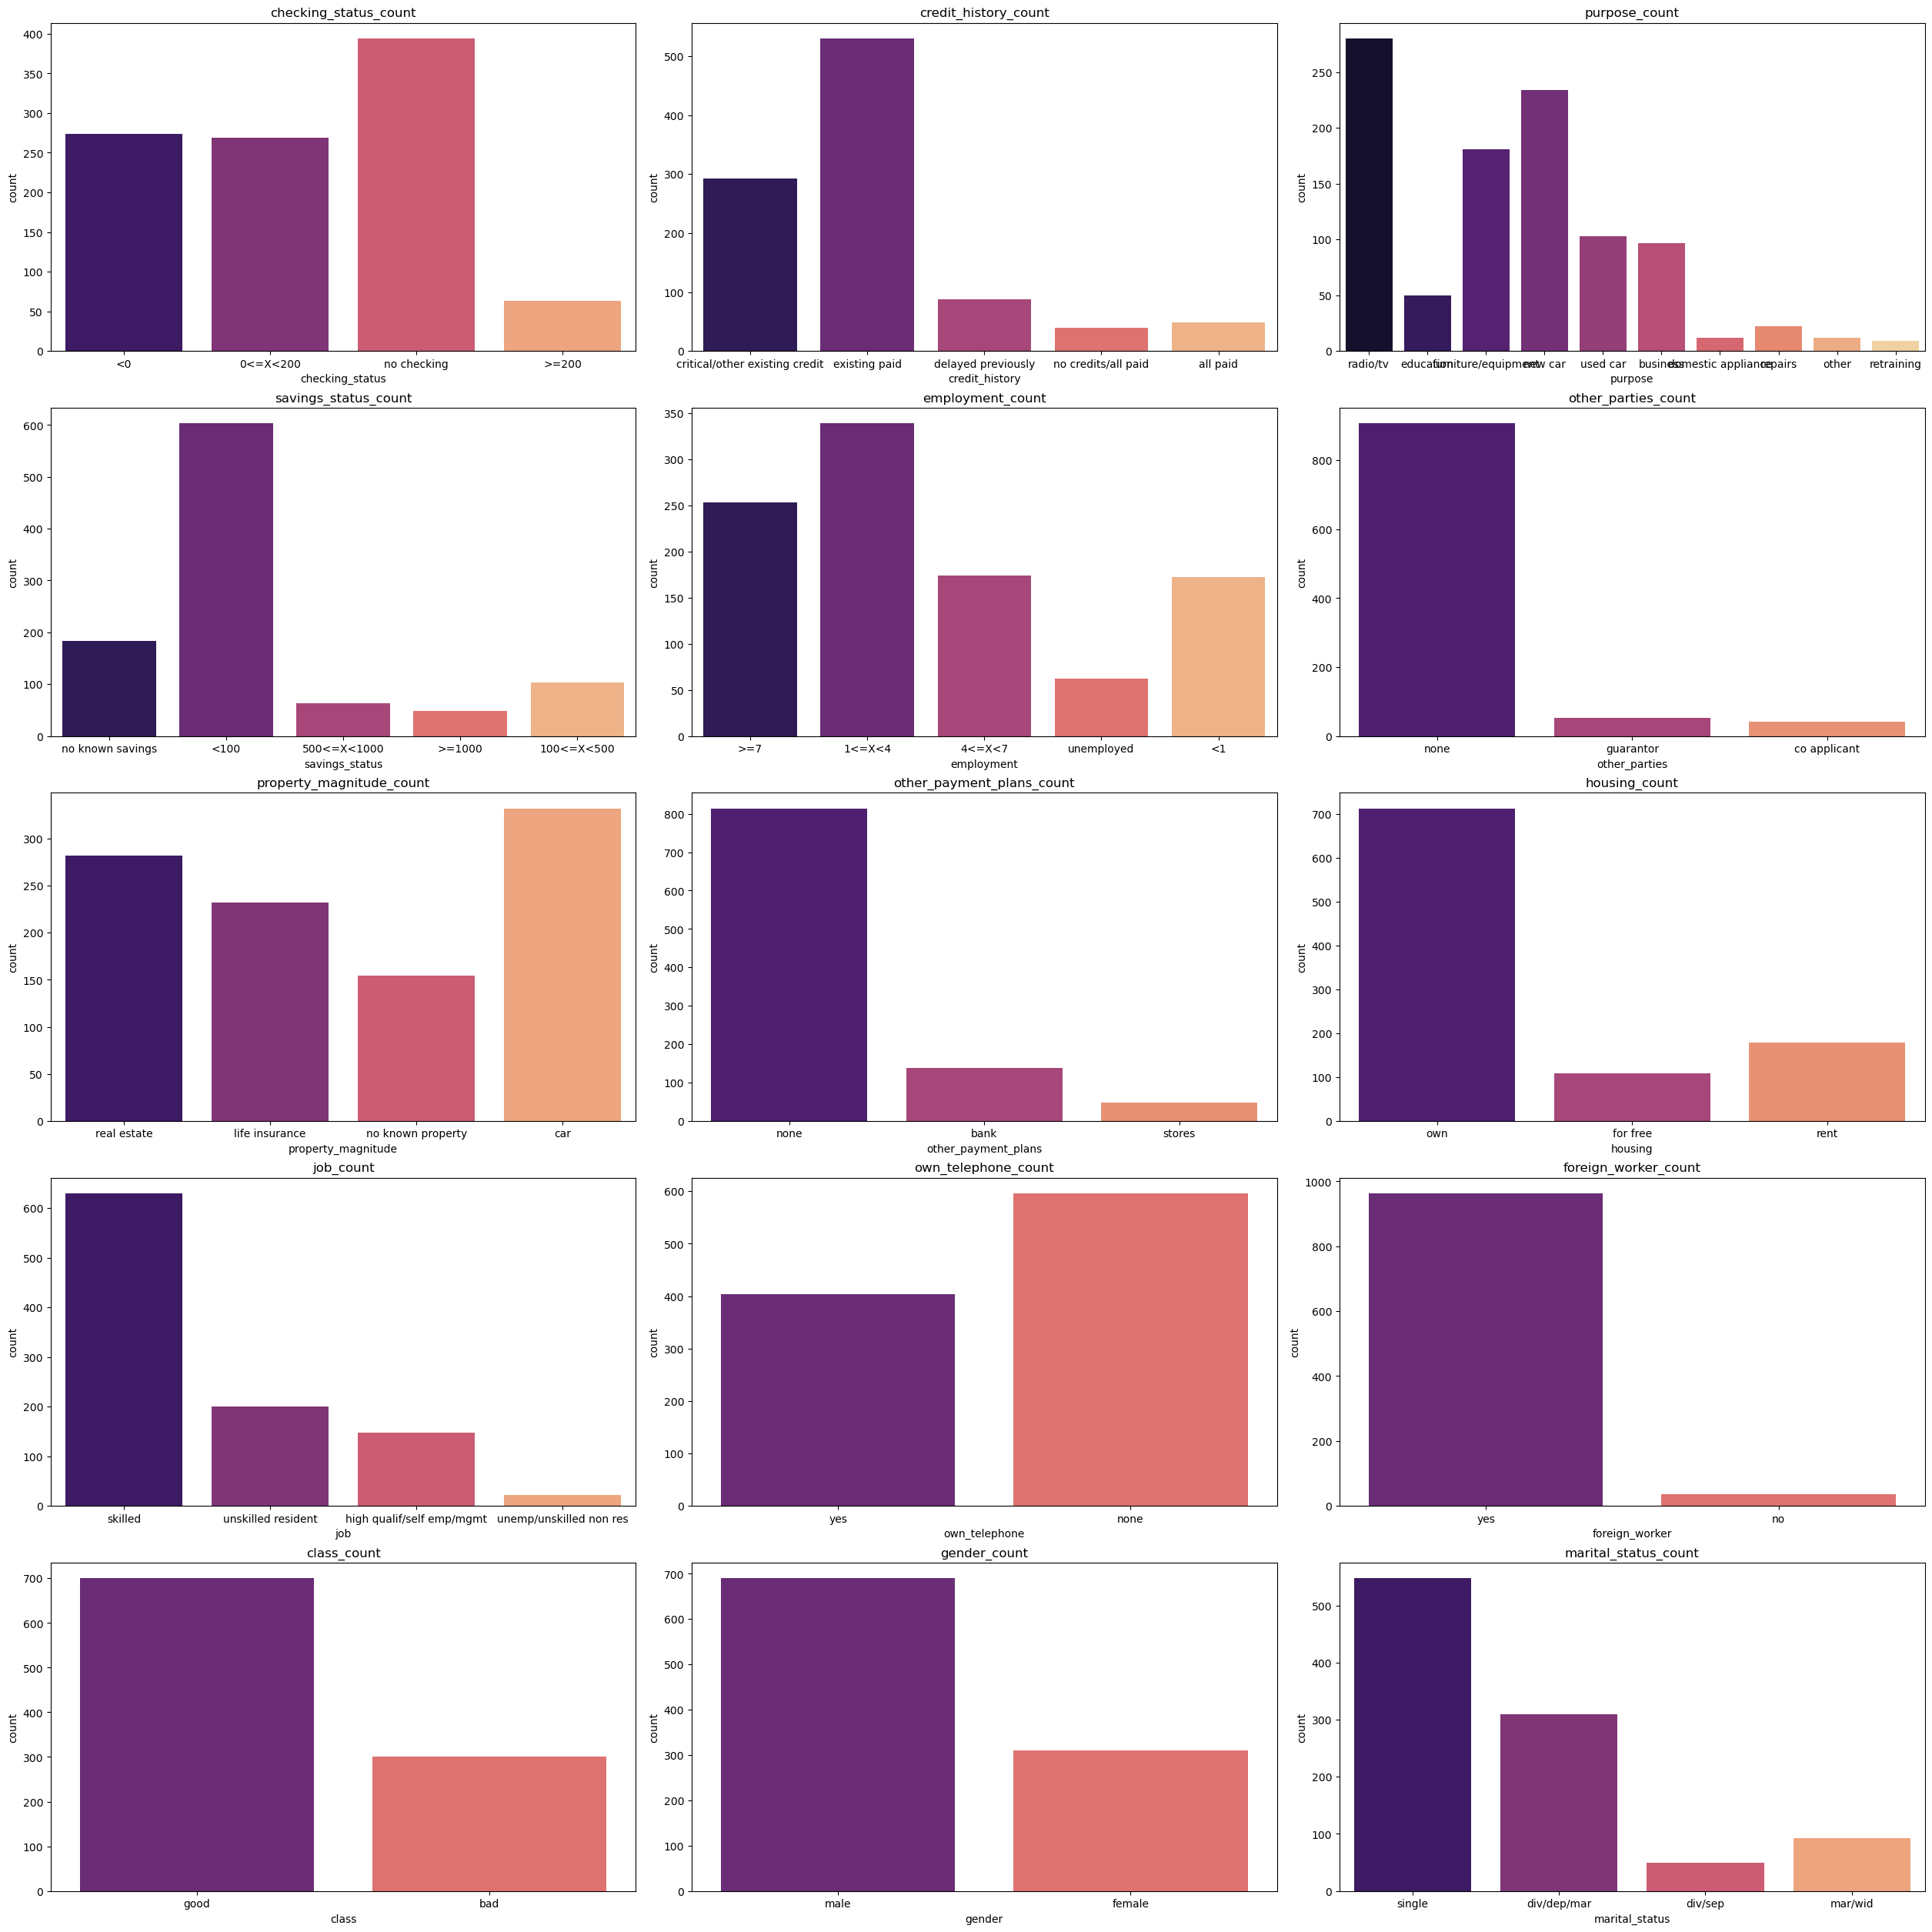

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=lst[i],palette='magma',)
    plt.title(lst[i]+'_count',)
plt.show()

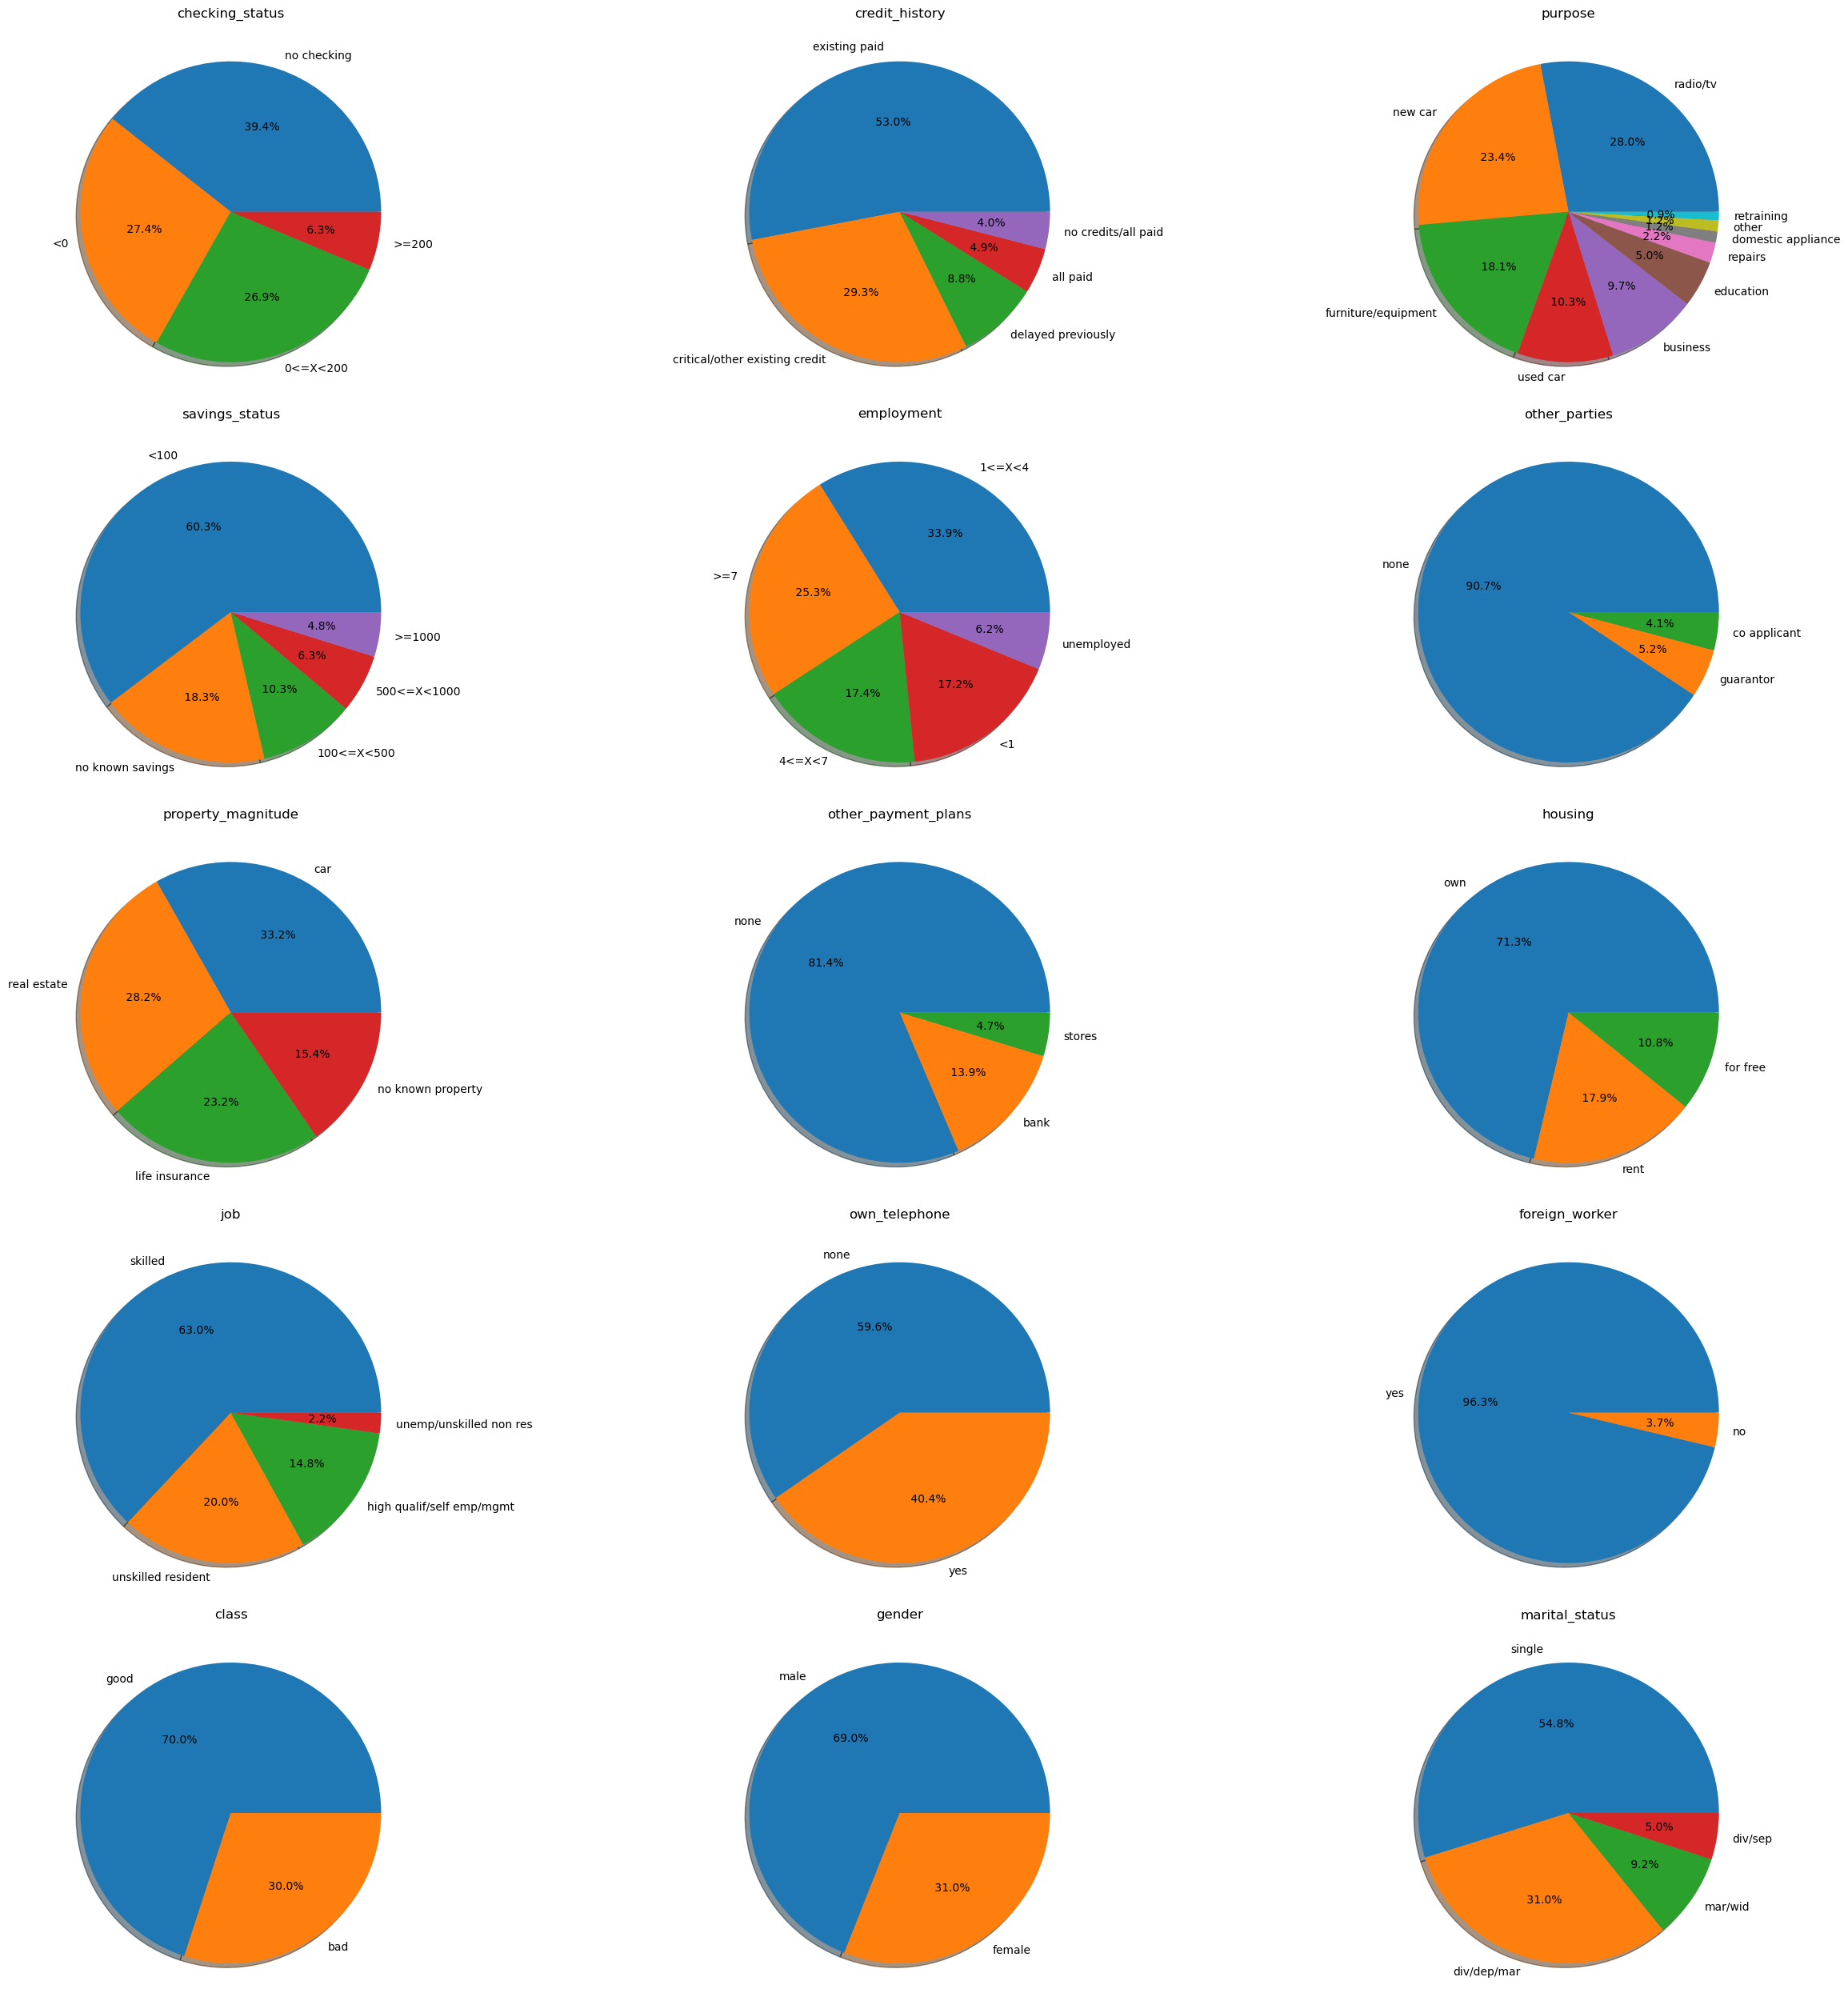

In [54]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    a=df[lst[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(lst[i])
plt.show()

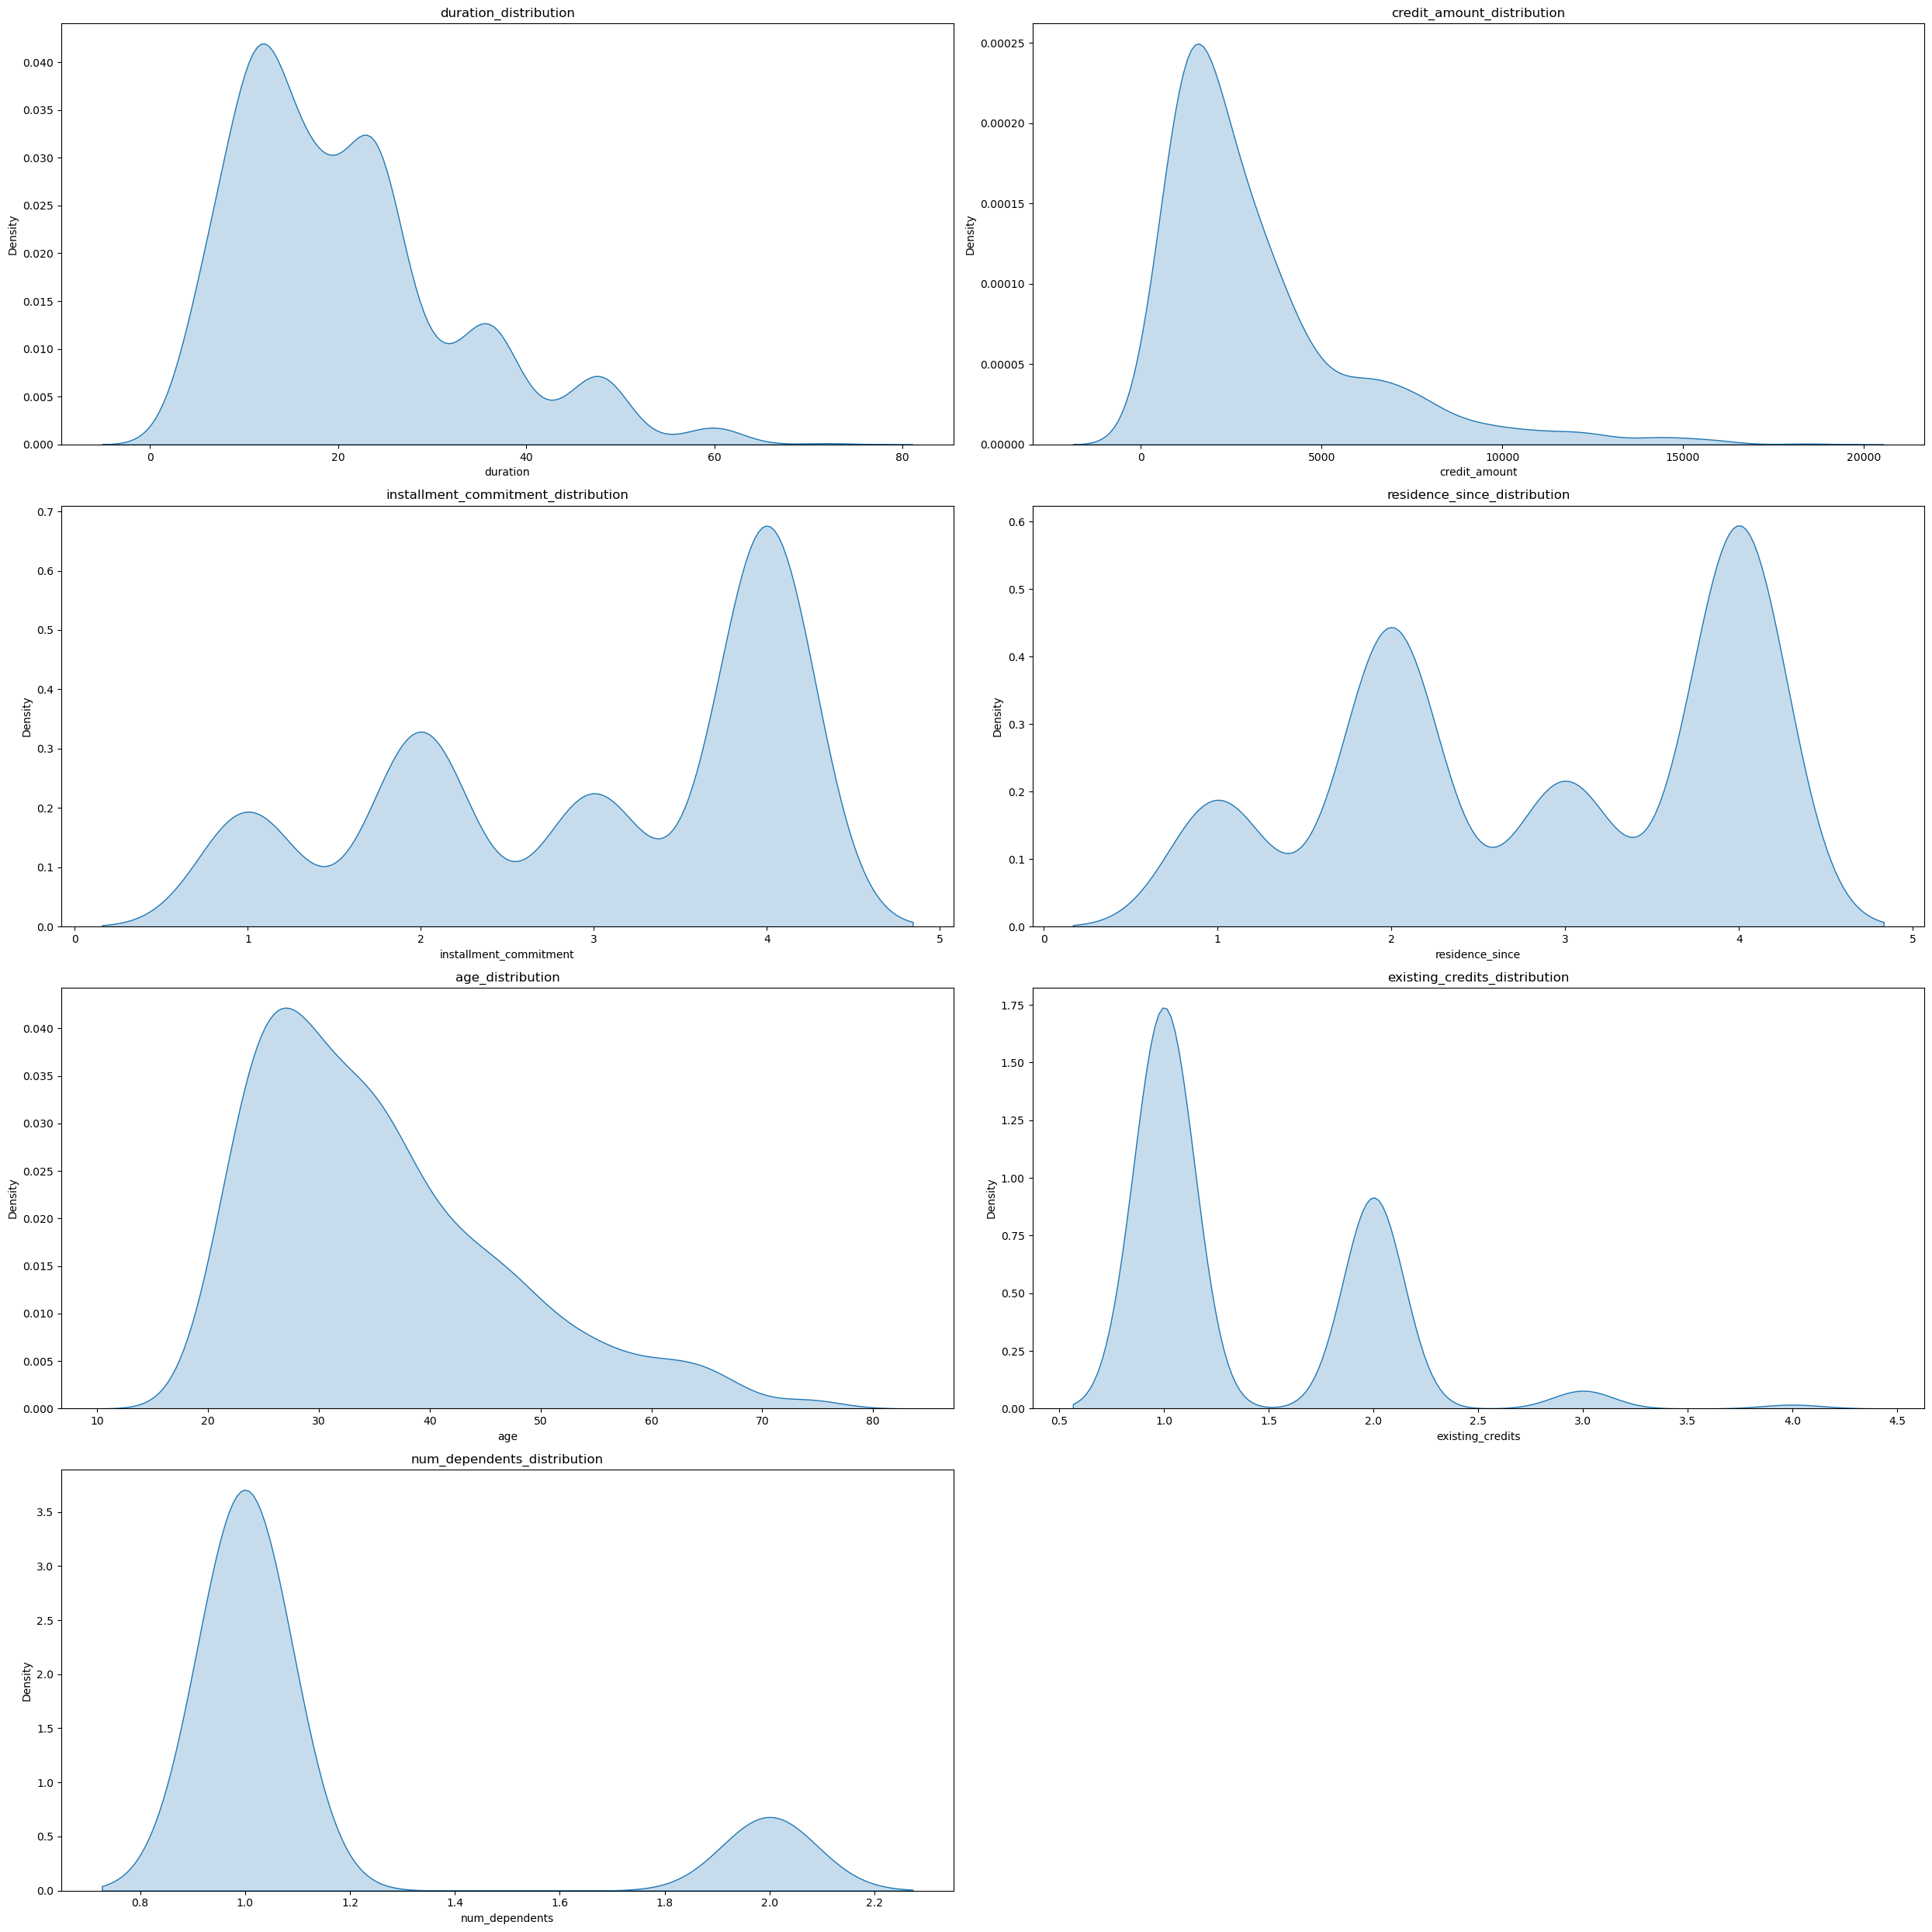

In [55]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25))
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df, x=lst[i], fill=True)
    plt.title(lst[i]+'_distribution')
plt.tight_layout()
plt.show()


#### 針對信用好壞 各種圖表

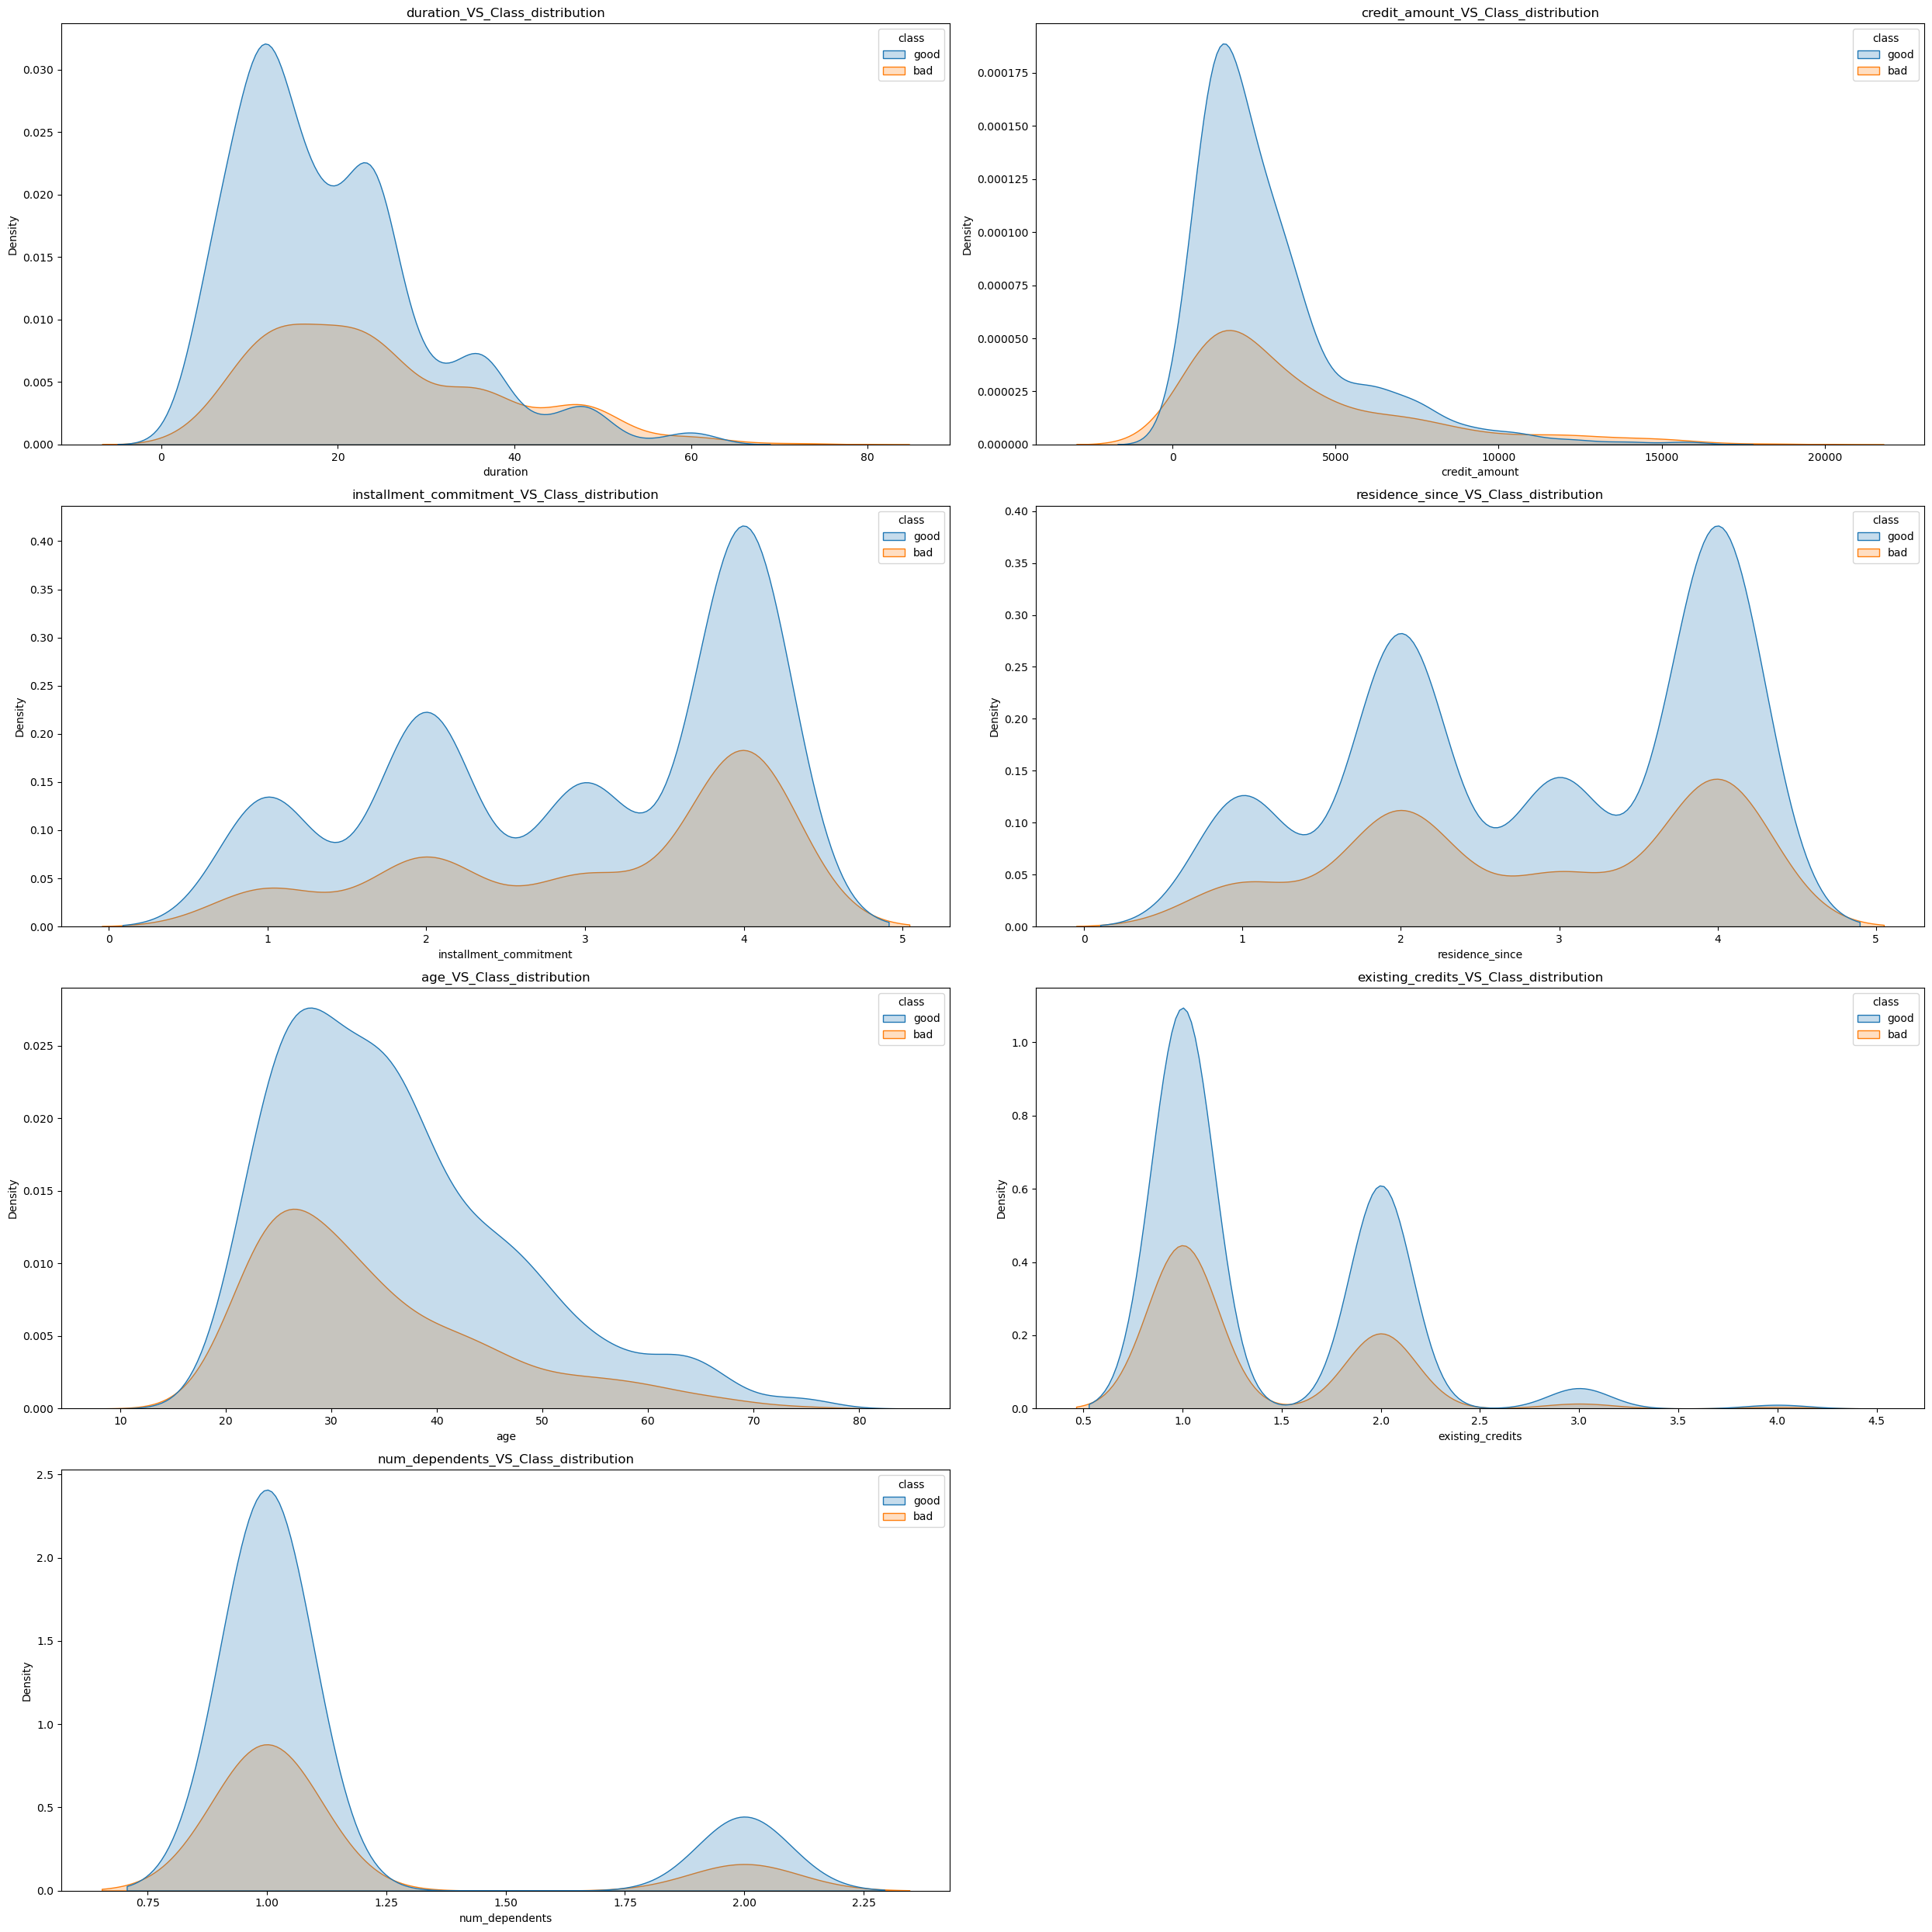

In [56]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25))
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df, x=lst[i], hue='class', fill=True)
    plt.title(lst[i]+'_VS_Class_distribution')
plt.tight_layout()
plt.show()


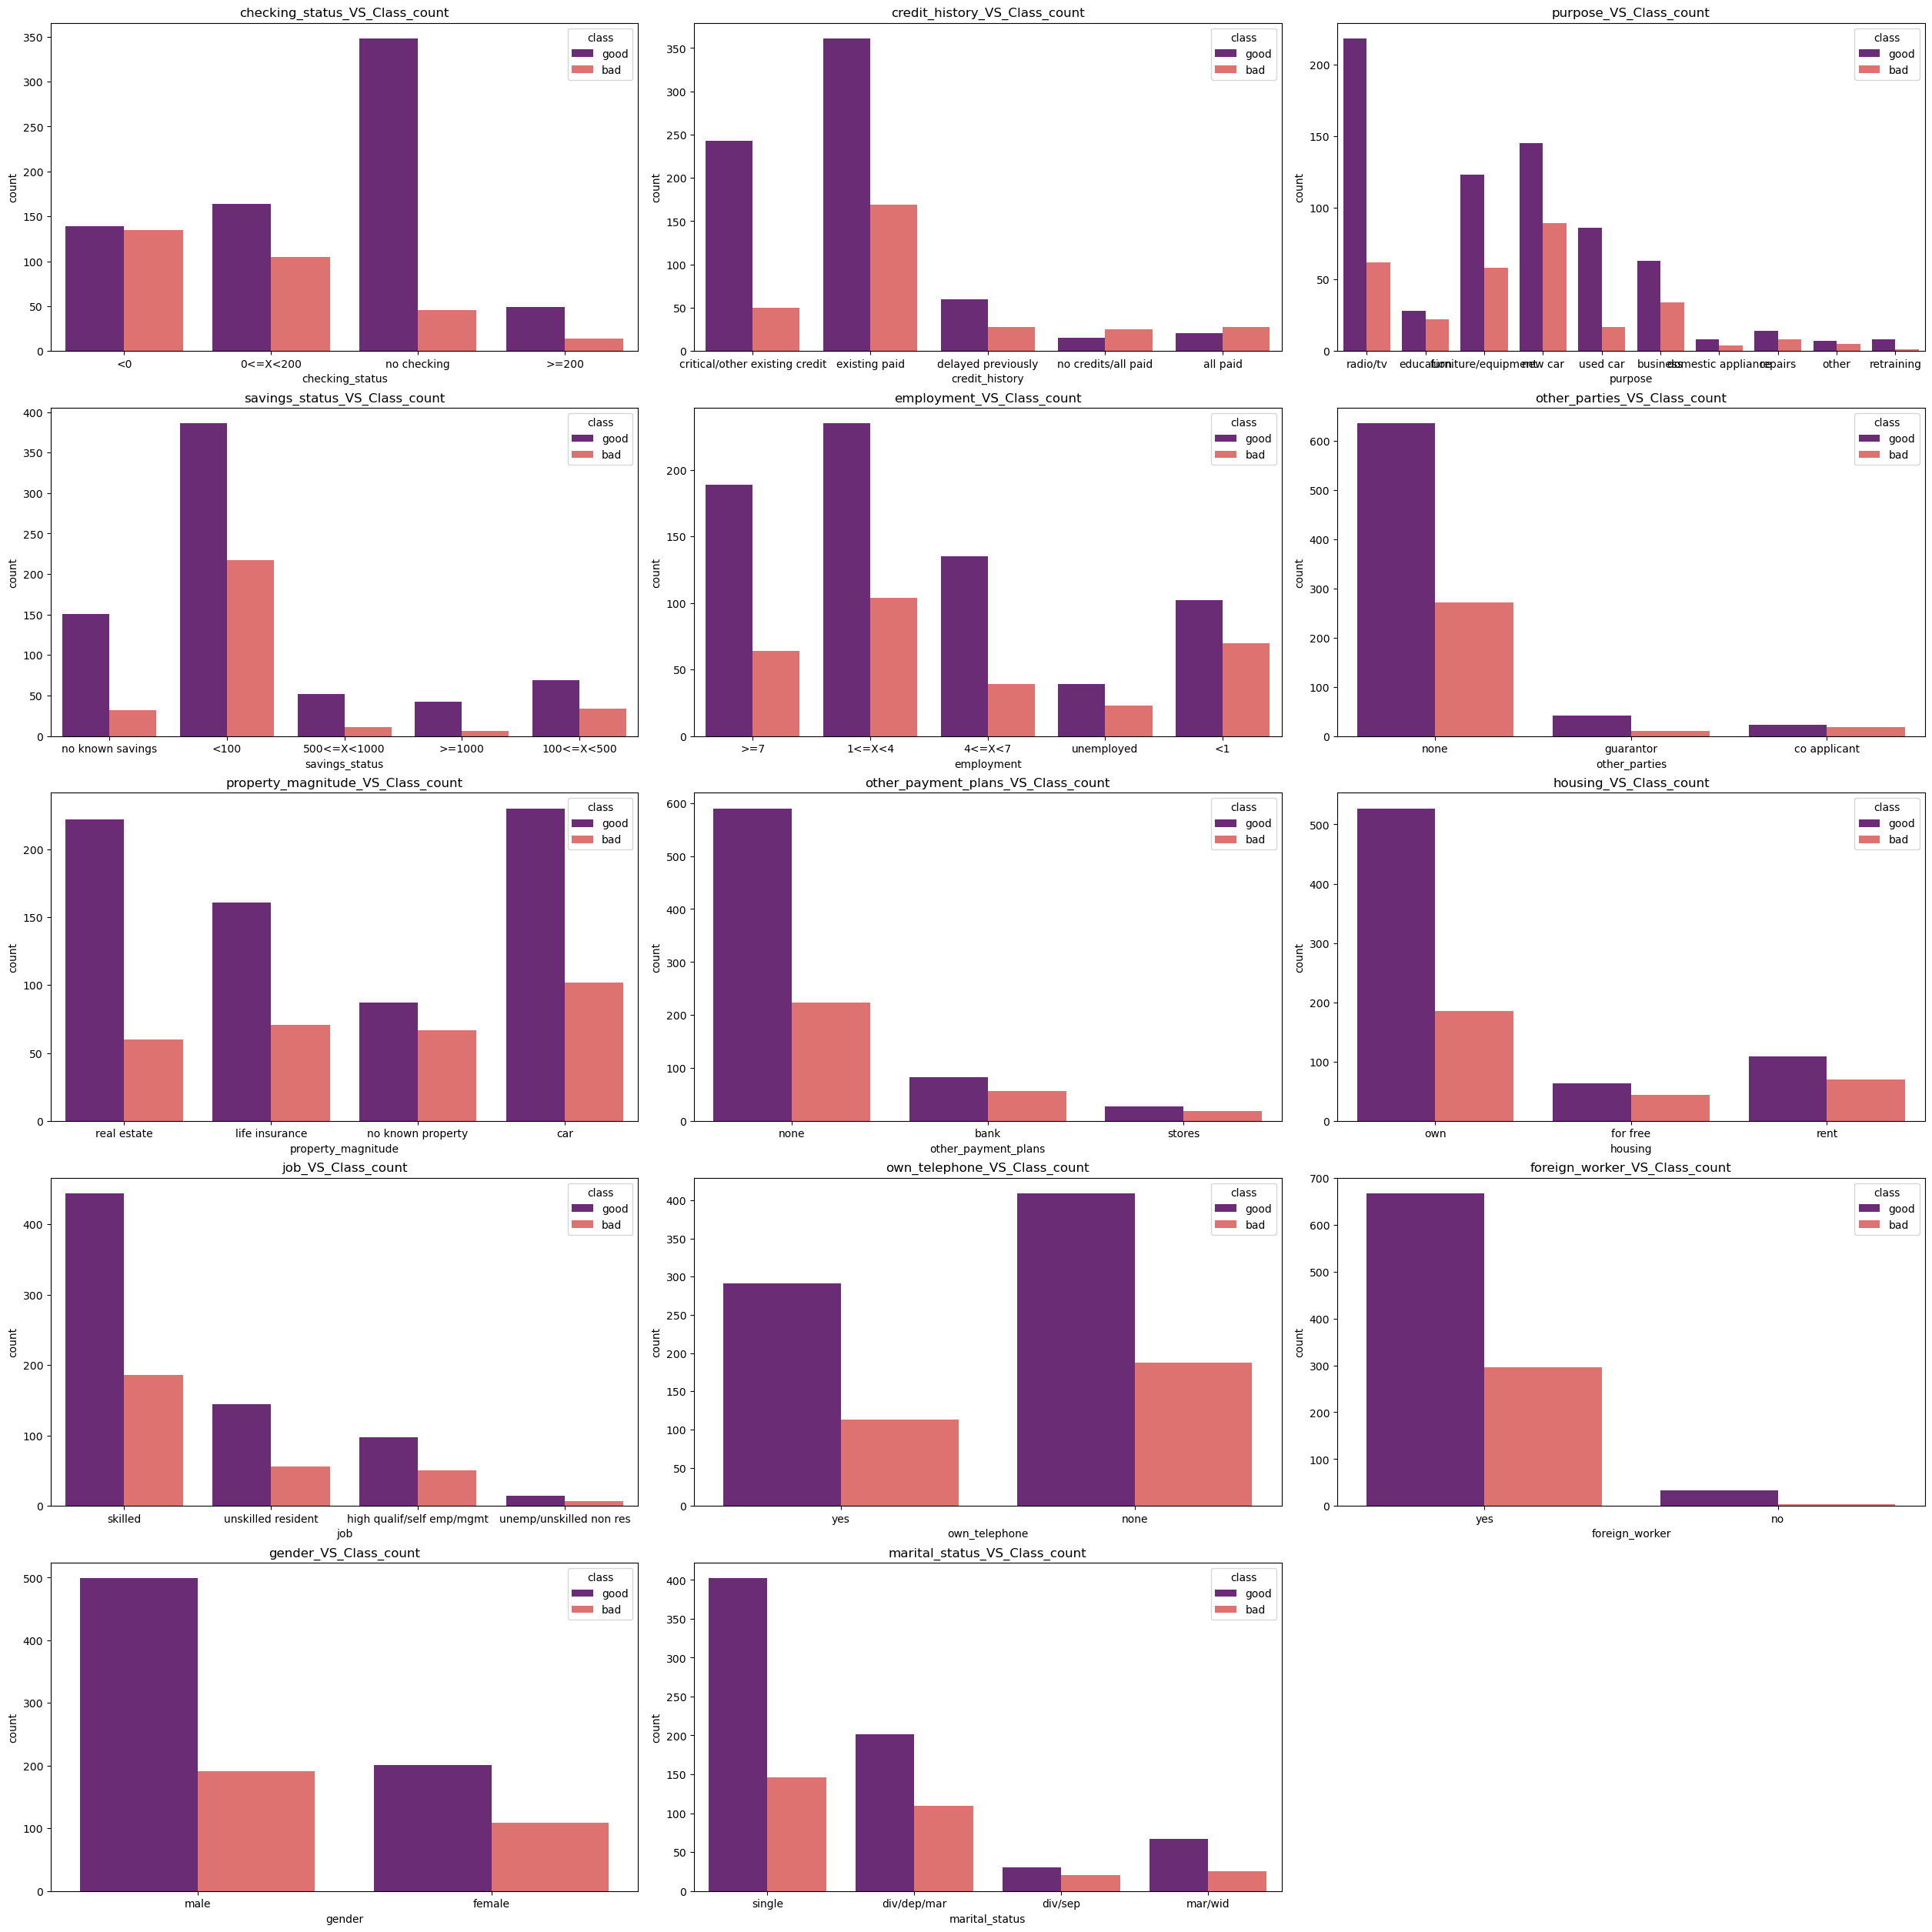

In [57]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=lst[i],palette='magma',hue='class')
    plt.title(lst[i]+'_VS_Class_count')
plt.show()

## 模型建立

### 特徵處理

In [58]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [59]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,4.0,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,2.0,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,3.0,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,4.0,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,4.0,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,4.0,...,none,own,1.0,unskilled resident,1.0,none,yes,good,female,div/dep/mar
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,4.0,...,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male,div/sep
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,4.0,...,none,own,1.0,skilled,1.0,none,yes,good,male,single
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,4.0,...,none,for free,1.0,skilled,1.0,yes,yes,bad,male,single


In [60]:
# 類別型資料編碼
categoryfeature=['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status']
for i in categoryfeature:
    df[i+'_encoder']=LabelEncoder().fit_transform(df[i])

# 數值型資料
num=df.select_dtypes(include=[np.number])

# Data Scaling
scaled_values = MinMaxScaler().fit_transform(num)  # returns a numpy array
df[num.columns] = scaled_values

# Scaled Data
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder,gender_encoder,marital_status_encoder
0,<0,0.029412,critical/other existing credit,radio/tv,0.050567,no known savings,>=7,1.000000,none,1.000000,...,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0,1.0,1.0
1,0<=X<200,0.647059,existing paid,radio/tv,0.313690,<100,1<=X<4,0.333333,none,0.333333,...,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0,0.0,0.0
2,no checking,0.117647,critical/other existing credit,education,0.101574,<100,4<=X<7,0.333333,none,0.666667,...,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0,1.0,1.0
3,<0,0.558824,existing paid,furniture/equipment,0.419941,<100,4<=X<7,0.333333,guarantor,1.000000,...,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0,1.0,1.0
4,<0,0.294118,delayed previously,new car,0.254209,<100,1<=X<4,0.666667,none,1.000000,...,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0,1.0,1.0


In [61]:
# Drop the original categorical columns
df = df.drop(columns=categoryfeature)

# Split the data into train and test sets
X = df.drop('class_encoder', axis=1)
y = df['class_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

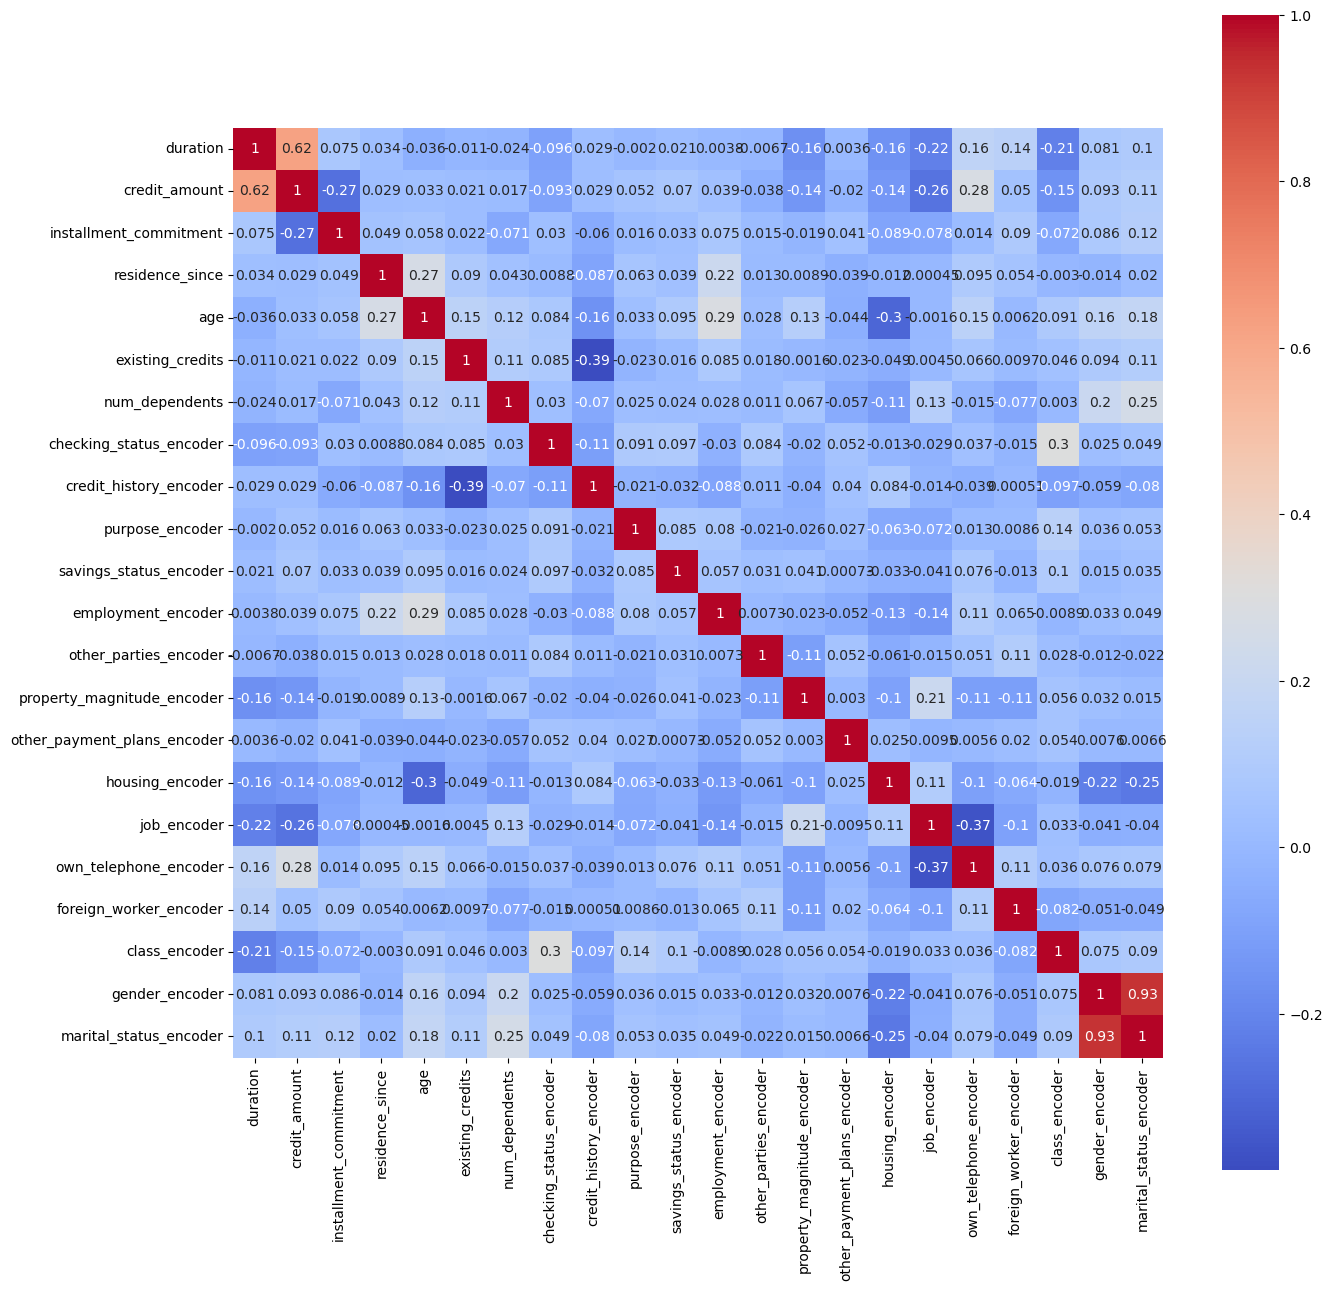

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相關係數矩陣
correlation_matrix = df.corr()

# 設置圖形大小
plt.figure(figsize=(15, 15))

# 繪製熱力圖
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# 顯示圖形
plt.show()


In [67]:
# 目標變量與其他特徵的相關性
target_correlation = correlation_matrix['class_encoder'].sort_values(ascending=False)
print(target_correlation)


class_encoder                  1.000000
checking_status_encoder        0.302406
purpose_encoder                0.138152
savings_status_encoder         0.103133
age                            0.091127
marital_status_encoder         0.089535
gender_encoder                 0.075493
property_magnitude_encoder     0.055529
other_payment_plans_encoder    0.053862
existing_credits               0.045732
own_telephone_encoder          0.036466
job_encoder                    0.032756
other_parties_encoder          0.028441
num_dependents                 0.003015
residence_since               -0.002967
employment_encoder            -0.008932
housing_encoder               -0.019315
installment_commitment        -0.072404
foreign_worker_encoder        -0.082079
credit_history_encoder        -0.097054
credit_amount                 -0.154739
duration                      -0.214927
Name: class_encoder, dtype: float64


Feature: duration, Importance: 0.09997601311160646
Feature: credit_amount, Importance: 0.13659251031594244
Feature: installment_commitment, Importance: 0.04356373843403071
Feature: residence_since, Importance: 0.039525884609026174
Feature: age, Importance: 0.1089940570817337
Feature: existing_credits, Importance: 0.022780527513643074
Feature: num_dependents, Importance: 0.011573457704258647
Feature: checking_status_encoder, Importance: 0.09359189873797608
Feature: credit_history_encoder, Importance: 0.05899440448776718
Feature: purpose_encoder, Importance: 0.06896011559127833
Feature: savings_status_encoder, Importance: 0.04253672758769439
Feature: employment_encoder, Importance: 0.05136227079164949
Feature: other_parties_encoder, Importance: 0.014466480268102015
Feature: property_magnitude_encoder, Importance: 0.04208482359708426
Feature: other_payment_plans_encoder, Importance: 0.029397533435784808
Feature: housing_encoder, Importance: 0.03266045111324321
Feature: job_encoder, Import

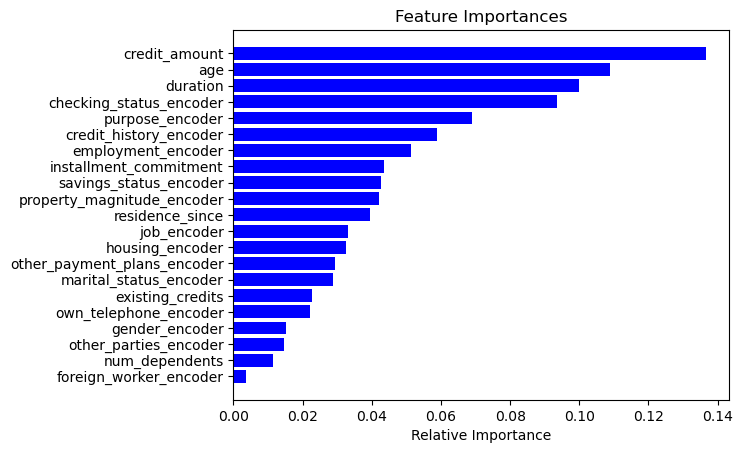

In [63]:
from sklearn.ensemble import RandomForestClassifier

# 訓練隨機森林模型
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 獲取特徵重要性
importances = model.feature_importances_

# 輸出特徵和相應的重要性
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


# 將特徵重要性排序並繪圖
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


d:\Users\hanklee\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: LogisticRegression
Accuracy: 0.725
              precision    recall  f1-score   support

         0.0       0.56      0.31      0.40        59
         1.0       0.76      0.90      0.82       141

    accuracy                           0.73       200
   macro avg       0.66      0.60      0.61       200
weighted avg       0.70      0.72      0.70       200

--------------------

Model: GaussianNB
Accuracy: 0.72
              precision    recall  f1-score   support

         0.0       0.52      0.61      0.56        59
         1.0       0.82      0.77      0.79       141

    accuracy                           0.72       200
   macro avg       0.67      0.69      0.68       200
weighted avg       0.74      0.72      0.73       200

--------------------

Model: KNeighborsClassifier
Accuracy: 0.73
              precision    recall  f1-score   support

         0.0       0.56      0.39      0.46        59
         1.0       0.77      0.87      0.82       141

    accuracy        

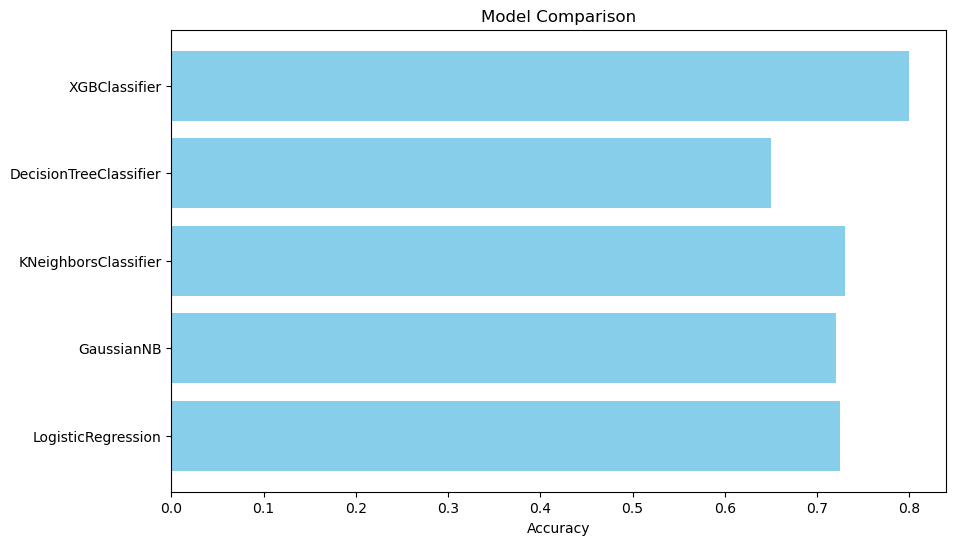

In [64]:
# Import necessary libraries
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("--------------------\n")
    return model.__class__.__name__, accuracy  # Return model name and accuracy

# Define the models
models = [LogisticRegression(max_iter=1000, random_state=42), 
          GaussianNB(), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(random_state=42),
          XGBClassifier eval_metric='logloss')]  

model_results = []  # List to store model results

# Train and evaluate each model
for model in models:
    result = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    model_results.append(result)

# Plotting model performance
model_names, accuracies = zip(*model_results)  # Unpack results
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

### 調整超參數 以XGBOOST為例

In [70]:
# 將資料拆成三份

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


Train Metrics: Accuracy = 0.9133333333333333, Recall = 0.9857482185273159, Precision = 0.9002169197396963, F1-Score = 0.9410430839002267
Validation Metrics: Accuracy = 0.735, Recall = 0.8985507246376812, Precision = 0.7607361963190185, F1-Score = 0.8239202657807309
Test Metrics: Accuracy = 0.75, Recall = 0.8865248226950354, Precision = 0.7861635220125787, F1-Score = 0.8333333333333334


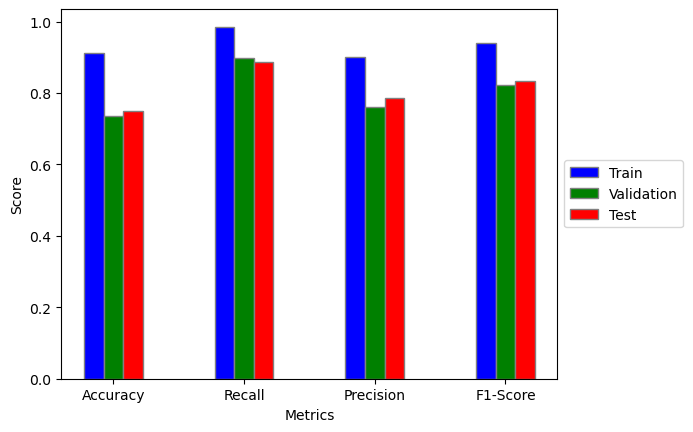

In [77]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# 定義超參數範圍
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    # add more parameters here according to your model
}

# 建立模型
model = XGBClassifier(eval_metric='logloss')

# 建立 GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# 對超參數進行網格搜索
grid_search.fit(X_train, y_train)

# 使用最佳超參數在訓練集上重新訓練模型
best_model = grid_search.best_estimator_

# 定義一個函數來評估模型並回傳各種指標
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    return accuracy, recall, precision, f1

# 評估模型在訓練集、驗證集和測試集上的性能
train_metrics = evaluate_model(best_model, X_train, y_train)
val_metrics = evaluate_model(best_model, X_val, y_val)
test_metrics = evaluate_model(best_model, X_test, y_test)

# 印出結果
print("Train Metrics: Accuracy = {}, Recall = {}, Precision = {}, F1-Score = {}".format(*train_metrics))
print("Validation Metrics: Accuracy = {}, Recall = {}, Precision = {}, F1-Score = {}".format(*val_metrics))
print("Test Metrics: Accuracy = {}, Recall = {}, Precision = {}, F1-Score = {}".format(*test_metrics))


metrics = np.array([train_metrics, val_metrics, test_metrics])
barWidth = 0.15
r1 = np.arange(len(train_metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, metrics[0, :], width = barWidth, color = 'b', edgecolor = 'grey', label='Train')
plt.bar(r2, metrics[1, :], width = barWidth, color = 'g', edgecolor = 'grey', label='Validation')
plt.bar(r3, metrics[2, :], width = barWidth, color = 'r', edgecolor = 'grey', label='Test')

# Adding xticks
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks([r + barWidth for r in range(len(train_metrics))], ['Accuracy', 'Recall', 'Precision', 'F1-Score'])

# Adding legend and adjusting its position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



